In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style = 'darkgrid')
%matplotlib inline

In [2]:
# 그래프 범례 한글 깨짐 방지

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
df = pd.read_csv('jeju_financial_life_data.csv')

In [4]:
df.head()

zip_cd  year_month      x_axis     y_axis  sex  age  job_majorc  \
0   63299      201902  126.565889  33.513210    1   54         0.0   
1   63560      201902  126.497121  33.247225    1   59         0.0   
2   63560      201902  126.497121  33.247225    2   49         0.0   
3   63560      201902  126.497121  33.247225    1   54         0.0   
4   63560      201902  126.497121  33.247225    1   49         0.0   

   job_smallc  job_public  job_profession  ...   avg_debt  avg_debt_credit  \
0    0.166667    0.000000        0.000000  ...   24285196         11419148   
1    0.125000    0.000000        0.000000  ...  108571077         25896955   
2    0.250000    0.000000        0.000000  ...   26424335         12015311   
3    0.181818    0.090909        0.090909  ...  647716901         39952556   
4    0.250000    0.000000        0.000000  ...  248232725         35712501   

   avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  avg_debt_collateral  \
0         8863595           55550000                 0             55550000   
1        13317443                  0         200000000             74421721   
2        12015311           40833359                 0             40833359   
3        21558153           36697792                 0            706300496   
4         5568751                  0                 0            626810674   

   avg_credit_rat  medium_resid_rat  large_resid_rat  vehicle_own_rat  
0               5         -999999.0        -999999.0         0.000000  
1               4         -999999.0        -999999.0         0.000000  
2               2         -999999.0        -999999.0         0.000000  
3               4         -999999.0        -999999.0         0.166667  
4               5         -999999.0        -999999.0         0.000000  

[5 rows x 27 columns]

In [5]:
#df['age_sep'] = df['age'].apply(lambda x:str(x)[0] + str(0) + str("대"))

In [10]:
# 5세구간 구분 칼럼 생성
df['5세구간']=1

for i in range(0,len(df['5세구간'])):
    
    if df['age'][i] == 24:        
        df['5세구간'][i]="24세 이하"
        
    elif df['age'][i] == 29:
        df['5세구간'][i]="25~29세"
        
    elif df['age'][i] == 34:  
        df['5세구간'][i]="30~34세"

    elif df['age'][i] == 39:
        df['5세구간'][i]="35~39세"
        
    elif df['age'][i] == 44:
        df['5세구간'][i]="40~44세"
        
    elif df['age'][i] == 49:
        df['5세구간'][i]="45~49세"
        
        
    elif df['age'][i] == 54:
        df['5세구간'][i]="50~54세"
    
    elif df['age'][i] == 59:
        df['5세구간'][i]="55~59세"
        
    elif df['age'][i] == 64:
        df['5세구간'][i]="60~64세"
        
    elif df['age'][i] == 69:
        df['5세구간'][i]="65~69세"
        
    elif df['age'][i] == 74:
        df['5세구간'][i]="70~74세"
        
    elif df['age'][i] == 79:
        df['5세구간'][i]="75~79세"
        
    elif df['age'][i] == 99:
        df['5세구간'][i]="80세 이상"

C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [11]:
df['5세구간'].head()

0    50~54세
1    55~59세
2    45~49세
3    50~54세
4    45~49세
Name: 5세구간, dtype: object

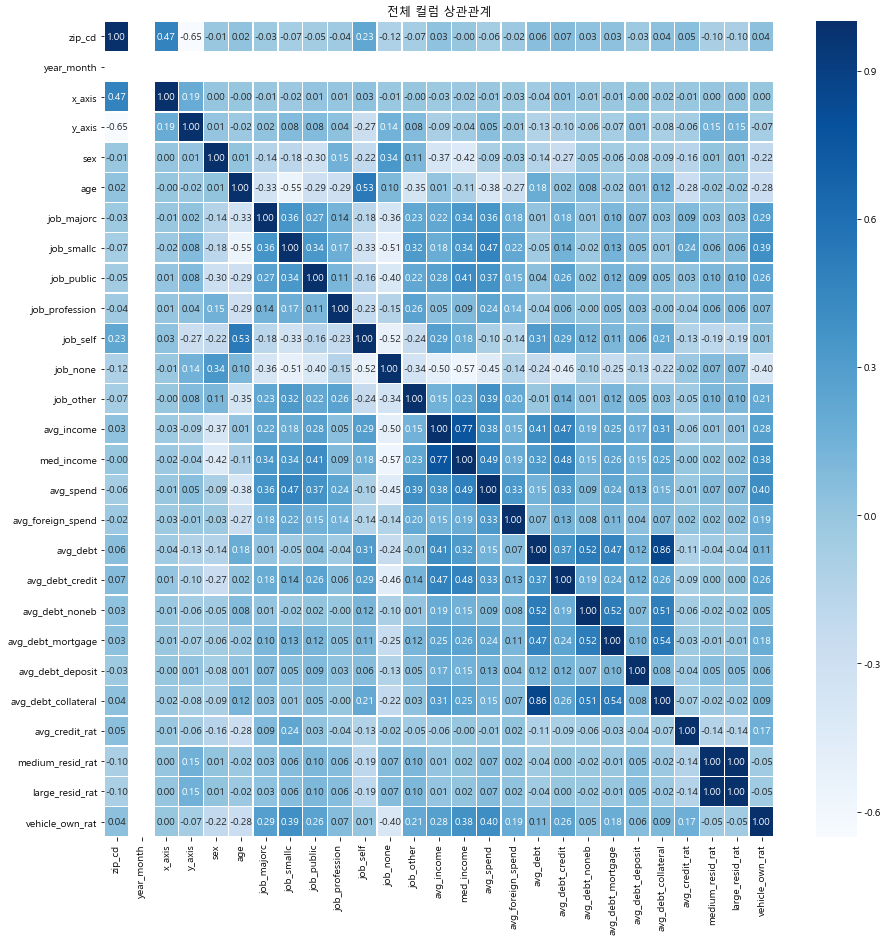

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

plt.title('전체 컬럼 상관관계')
plt.show()

In [9]:
df['year_month'].unique()

array([201902], dtype=int64)

In [10]:
# 불필요한 colum삭제
df = df.drop('year_month', axis=1)

In [12]:
df.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat', 'age_sep',
       'age_5sep'],
      dtype='object')

In [7]:
#df.info()

In [35]:
# 연령대별 
df2 = df.groupby('5세구간')[['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other']].mean()
df2.columns = ['대기업','중소기업','공기업','전문직','자영업','무직','판단불가']
df2

대기업      중소기업       공기업       전문직       자영업        무직      판단불가
5세구간                                                                        
24세 이하  0.008958  0.094524  0.012078  0.011934  0.005814  0.846366  0.020327
25~29세  0.034956  0.206722  0.050597  0.031416  0.035005  0.584172  0.057133
30~34세  0.051970  0.257178  0.061463  0.030693  0.072501  0.451053  0.075143
35~39세  0.051124  0.254919  0.051681  0.030538  0.130753  0.403375  0.077611
40~44세  0.046792  0.227924  0.049446  0.021678  0.178254  0.404247  0.071659
45~49세  0.041607  0.200167  0.049010  0.015056  0.217277  0.420559  0.056323
50~54세  0.032378  0.171889  0.046043  0.013962  0.264353  0.418090  0.053285
55~59세  0.024146  0.136843  0.042845  0.010780  0.310678  0.425833  0.048874
60~64세  0.014267  0.106799  0.026705  0.009197  0.339109  0.464504  0.039419
65~69세  0.008359  0.076712  0.011362  0.006493  0.368590  0.507472  0.021013
70~74세  0.002457  0.034043  0.002496  0.003244  0.268309  0.683839  0.005612
75~79세  0.000782  0.013655  0.001574  0.001976  0.281783  0.697438  0.002792
80세 이상  0.000584  0.007025  0.000739  0.001422  0.283889  0.704080  0.002261

In [39]:
df2.columns

Index(['job_majorc', 'job_smallc', 'job_public', 'job_profession', 'job_self',
       'job_none', 'job_other'],
      dtype='object')

In [40]:
df2.index

Index(['24세 이하', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세',
       '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80세 이상'],
      dtype='object', name='age_5sep')

In [46]:
df2.iloc[0].values

array([0.00895815, 0.0945235 , 0.01207774, 0.01193372, 0.00581379,
       0.84636632, 0.02032683])

### 그래프1. < 나이대별 고객군의 직업군별 비율 >
* 50대 이후에는 자영업이 큰 비율을 차지하는 걸 알 수 있다.
* 20대와 70대 이상은 무직과 판단불가가 전체 비율의 절반 이상을 차지한다.
* 25~69세를 보면, 대기업&공기업&전문직보다 중소기업이 큰 비율을 차지한다.

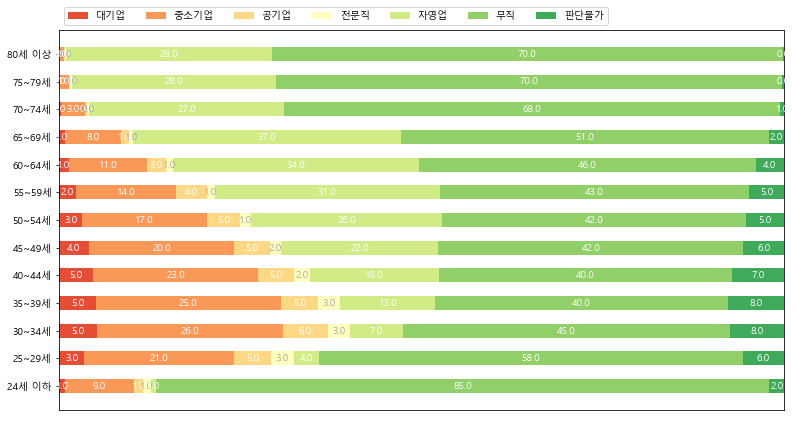

In [36]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['대기업','중소기업','공기업','전문직','자영업','무직','판단불가']

results = {
    '80세 이상': df2.iloc[12].values,
    '75~79세': df2.iloc[11].values,
    '70~74세': df2.iloc[10].values,
    '65~69세': df2.iloc[9].values,
    '60~64세': df2.iloc[8].values,
    '55~59세': df2.iloc[7].values,
    '50~54세': df2.iloc[6].values,
    '45~49세': df2.iloc[5].values,
    '40~44세': df2.iloc[4].values,
    '35~39세': df2.iloc[3].values,
    '30~34세': df2.iloc[2].values,
    '25~29세': df2.iloc[1].values,
    '24세 이하': df2.iloc[0].values  
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(13, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c*100)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)


plt.show()

In [14]:
df3 = df.groupby('5세구간')[['avg_debt','avg_debt_credit','avg_debt_noneb','avg_debt_mortgage','avg_debt_deposit','avg_debt_collateral']].sum()
df3.columns = ['채무 평균보유액','신용대출','비은행대출','주택담보대출','예적금유가증권담보대출','물건담보대출']
df3

채무 평균보유액         신용대출        비은행대출        주택담보대출  예적금유가증권담보대출  \
5세구간                                                                        
24세 이하   13426084907   6352253650   9594063827   12274749343   1033897076   
25~29세   27593336321  11476817591  16789590981   55450883713   3138345316   
30~34세   41892783231  16305460169  21258822741   75617721870   4725773286   
35~39세   64954181463  20309004088  31000639795  104147482277   8821787961   
40~44세   85714125985  22592948691  43642379299  114119852324   9255048105   
45~49세   99830270476  22693898196  47541915082  117749917429  13262910076   
50~54세  108529615595  22600550614  51226373683  118016279957  11963822418   
55~59세  109201413162  21771073877  51907991455  112412809593  11486243268   
60~64세  106564862069  18627355289  52474381402  108585723145  10930170957   
65~69세   88153554995  15500187136  38779280819   73052314813   7404032588   
70~74세   73151055325  14705138649  36264261572   58518562298   4831283083   
75~79세   56040743787  11768778600  28862935380   37269475033   3281372115   
80세 이상   47069588799   7674007918  17198759585   22069228328   1959350189   

              물건담보대출  
5세구간                  
24세 이하   20695638394  
25~29세   53272192130  
30~34세   73733810073  
35~39세  114368926774  
40~44세  138384764362  
45~49세  155053261013  
50~54세  164995410408  
55~59세  160897556007  
60~64세  161036965950  
65~69세  125492183321  
70~74세  105089877065  
75~79세   76284571679  
80세 이상   60256858976

### 그래프2. < 채무 보유액과 채무 종류 >
* 채무 평균 보유액 그래프와 나이대별 누적 채무가 비슷한 추이를 보인다.
* 5060대 채무가 많은 편이다.
* 주택 담보 대출이 모든 연령대에서 채무 누적이 가장 크다. 

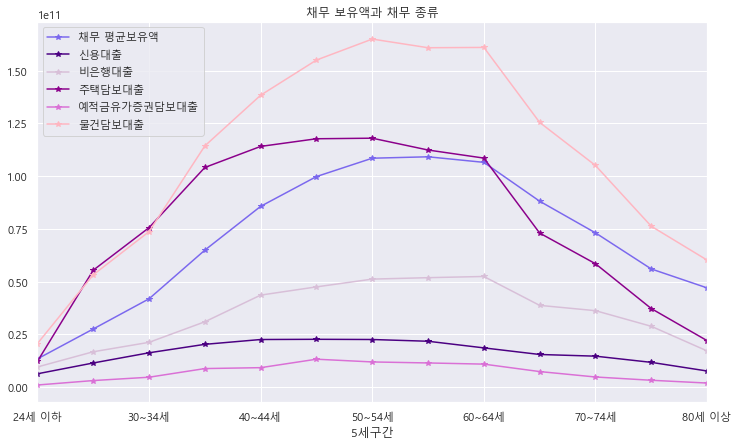

In [79]:
df3.plot(kind = 'line', grid = True, figsize = (12,7),
        color = ['mediumslateblue', 'indigo', 'thistle', 'darkmagenta',
                'orchid', 'lightpink'],
        marker =  '*')

plt.title('채무 보유액과 채무 종류')
plt.show()

### 그래프3. < 나이별 채무 데이터 분포 >
* 중간값과 최대, 최소를 통해 전체적인 데이터의 분포를 알 수 있다.
* 신용대출과 예적금유가증권담보대출 데이터가 대체적으로 중간값에 가까운 값을 가진다.
* 최소값으로 비교해도 물건담보와 주택담보가 월등히 높음을 알 수 있다.

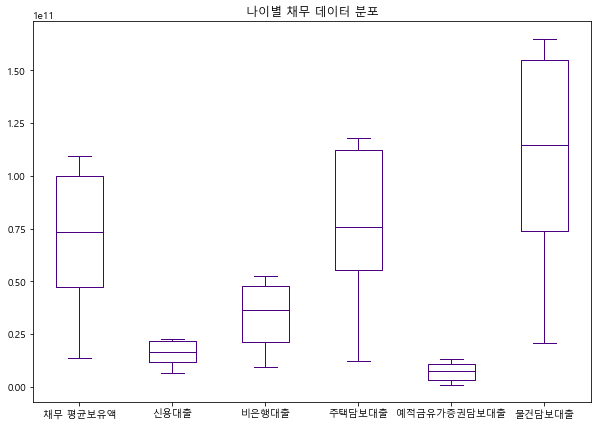

In [59]:
df3.plot(kind = 'box', grid = False, figsize = (10,7), 
        color = 'indigo')

plt.title('나이별 채무 데이터 분포', fontsize = 'large')
plt.show()

In [5]:
# 남녀 컬럼
df['남녀']=1

for i in range(0,len(df['남녀'])):
    
    if df['sex'][i] == 1:        
        df['남녀'][i]="남성"
        
    elif df['sex'][i] == 2:
        df['남녀'][i]="여성"

C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ghena\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ghena\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
df['남녀'].head()

0    남성
1    남성
2    여성
3    남성
4    남성
Name: 남녀, dtype: object

In [81]:
df4 = df.groupby(['남녀','5세구간'])[['avg_debt_credit','avg_debt_noneb','avg_debt_mortgage','avg_debt_deposit','avg_debt_collateral']].sum()
df4.columns = ['신용대출','비은행대출','주택담보대출','예적금유가증권담보대출','물건담보대출']
df4

신용대출        비은행대출       주택담보대출  예적금유가증권담보대출       물건담보대출
남녀 5세구간                                                                   
남성 24세 이하   3256662379   5542601425   7191840762    608316849  12741774948
   25~29세   6255499785   9707208526  33899640358   1727478819  33048781966
   30~34세   9375031913  12298173380  43343455497   2825153944  44053982654
   35~39세  11821557836  17476318523  55203671171   5336552836  62286267828
   40~44세  13734430427  25702671001  61707483498   5903736814  78919697081
   45~49세  13461533744  25554103947  60531318745   8359763665  82639237405
   50~54세  13524536134  27442391169  63177427375   7360478372  91874287463
   55~59세  12815128019  26920859857  58014259649   7439582441  85882332792
   60~64세  11073446432  26645397796  56447063446   7122054686  86073590582
   65~69세   9483410346  19989839288  39424198930   4839495588  71696301372
   70~74세   9488486918  24008665928  37269068467   2682065724  61824296281
   75~79세   7523414019  14889694328  19498920286   2227181006  44804079797
   80세 이상   5161493305  11679838715  11724735967   1117929676  40960859927
여성 24세 이하   3095591271   4051462402   5082908581    425580227   7953863446
   25~29세   5221317806   7082382455  21551243355   1410866497  20223410164
   30~34세   6930428256   8960649361  32274266373   1900619342  29679827419
   35~39세   8487446252  13524321272  48943811106   3485235125  52082658946
   40~44세   8858518264  17939708298  52412368826   3351311291  59465067281
   45~49세   9232364452  21987811135  57218598684   4903146411  72414023608
   50~54세   9076014480  23783982514  54838852582   4603344046  73121122945
   55~59세   8955945858  24987131598  54398549944   4046660827  75015223215
   60~64세   7553908857  25828983606  52138659699   3808116271  74963375368
   65~69세   6016776790  18789441531  33628115883   2564537000  53795881949
   70~74세   5216651731  12255595644  21249493831   2149217359  43265580784
   75~79세   4245364581  13973241052  17770554747   1054191109  31480491882
   80세 이상   2512514613   5518920870  10344492361    841420513  19295999049

# 그래프4. < 남성 나이별 채무 비율 >
* 나이별 채무 비율이 가장 높은 컬럼을 간격(slice)로 구분했다.
* 25~29세 남성만 주택담보대출이 가장 높은 비중을 차지한다.
* 대체적으로 연령이 높을 수록 물건담보대출의 비율이 커진다.
* 75세 이상부터는 주택담보대출 비율이 큰 폭으로 줄어든다.

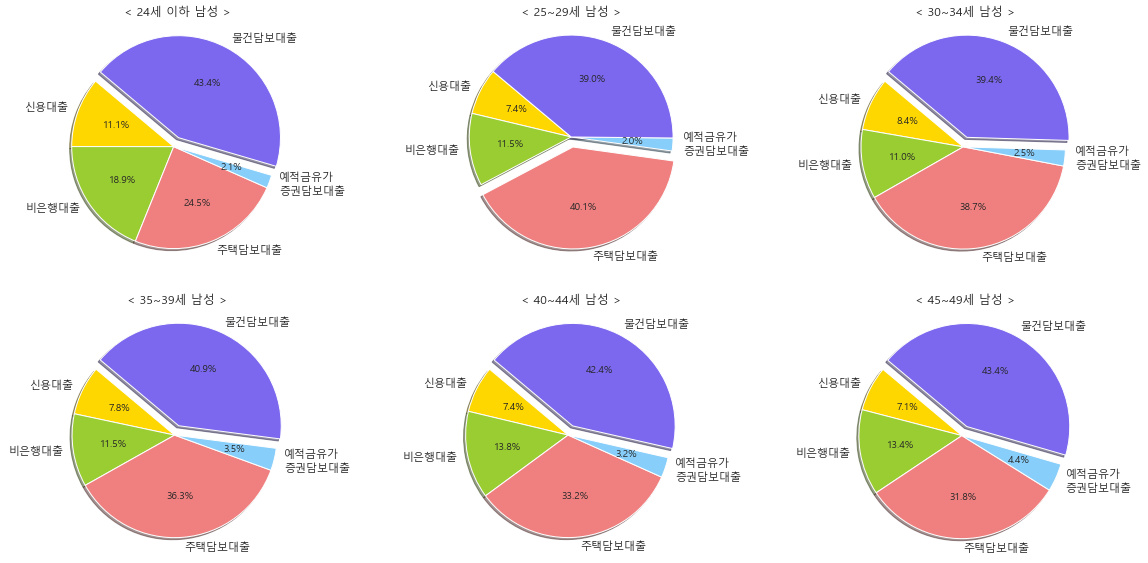

In [122]:
labels = ['신용대출','비은행대출','주택담보대출','예적금유가\n증권담보대출','물건담보대출']
plt.figure(figsize=(20,15))

plt.subplot(331)
sizes = df4.iloc[0].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 24세 이하 남성 >')


plt.subplot(332)
sizes = df4.iloc[1].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 25~29세 남성 >')


plt.subplot(333)
sizes = df4.iloc[2].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 30~34세 남성 >')


plt.subplot(334)
sizes = df4.iloc[3].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 35~39세 남성 >')

plt.subplot(335)
sizes = df4.iloc[4].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 40~44세 남성 >')

plt.subplot(336)
sizes = df4.iloc[5].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 45~49세 남성 >')


plt.show()


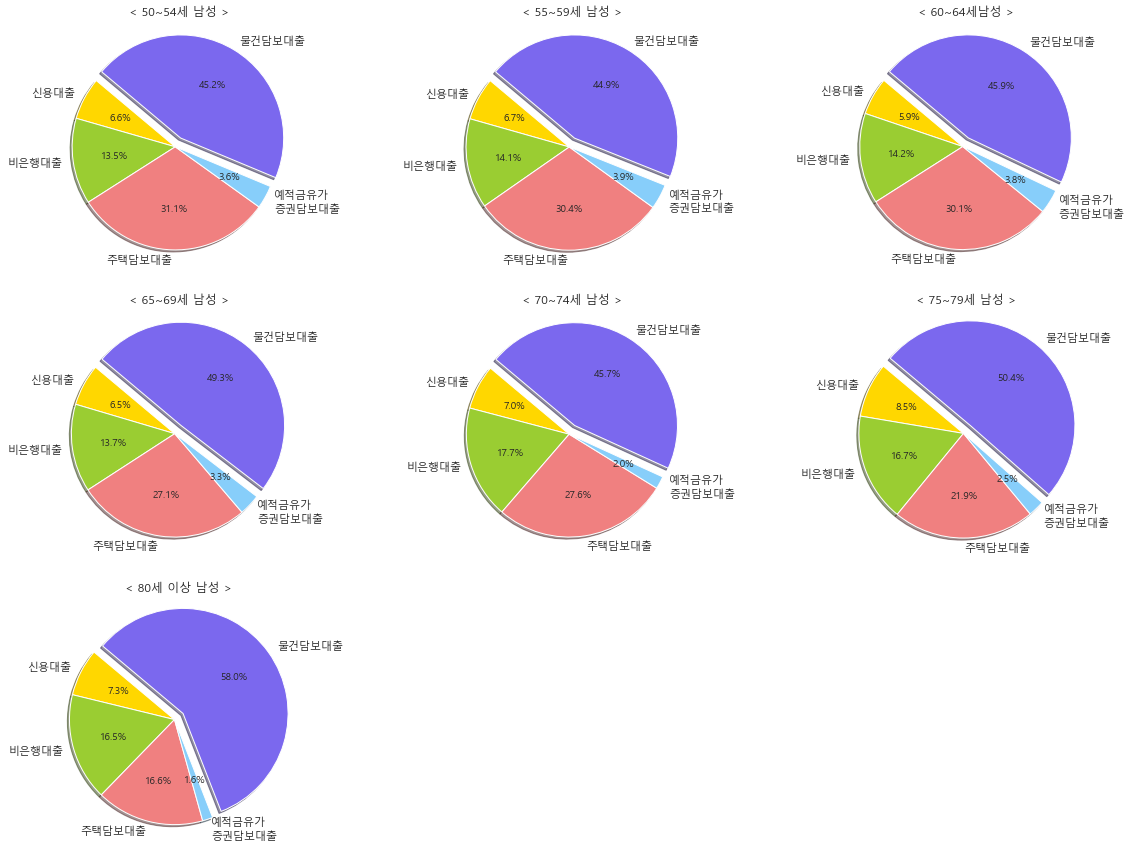

In [117]:
plt.figure(figsize=(20,15))

plt.subplot(331)
sizes = df4.iloc[6].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 50~54세 남성 >')


plt.subplot(332)
sizes = df4.iloc[7].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 55~59세 남성 >')


plt.subplot(333)
sizes = df4.iloc[8].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 60~64세남성 >')


plt.subplot(334)
sizes = df4.iloc[9].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 65~69세 남성 >')

plt.subplot(335)
sizes = df4.iloc[10].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 70~74세 남성 >')

plt.subplot(336)
sizes = df4.iloc[11].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 75~79세 남성 >')

plt.subplot(337)
sizes = df4.iloc[12].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 80세 이상 남성 >')


plt.show()

# 그래프5. < 여성 나이별 채무 비율 >
* 나이별 채무 비율이 가장 높은 컬럼 간격(slice)로 구분했다.
* 25~34세 여성만 주택담보대출이 가장 높은 비중을 차지한다.
* 대체적으로 연령이 높을 수록 물건담보대출의 비율이 더 커진다.
* 75세이상 일때 주택담보대출 비율이 남성보다 크다.

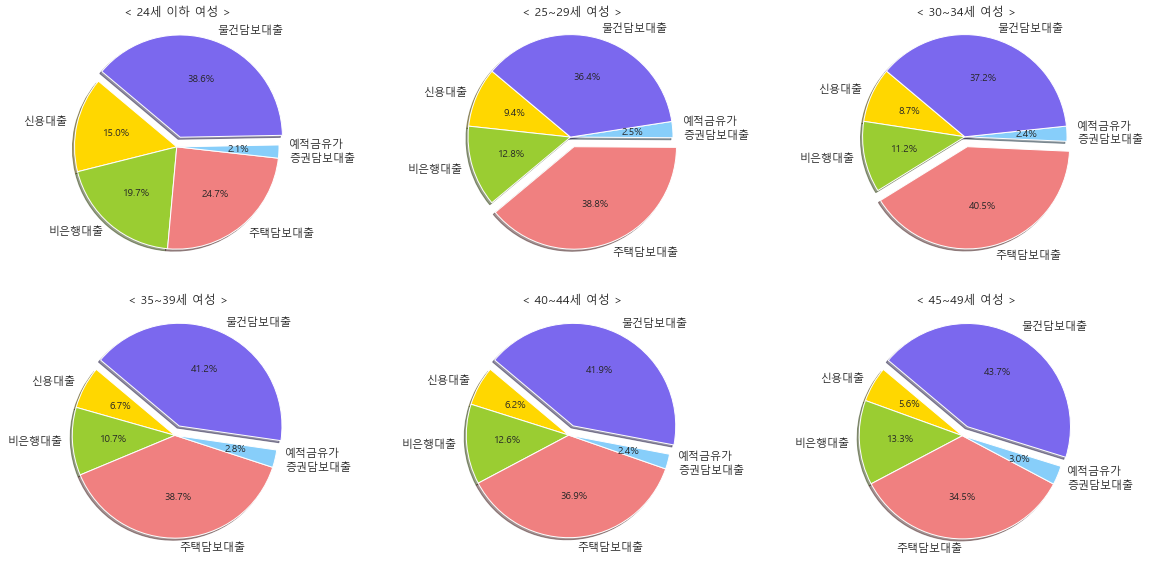

In [120]:
labels = ['신용대출','비은행대출','주택담보대출','예적금유가\n증권담보대출','물건담보대출']
plt.figure(figsize=(20,15))

plt.subplot(331)
sizes = df4.iloc[13].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 24세 이하 여성 >')


plt.subplot(332)
sizes = df4.iloc[14].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 25~29세 여성 >')


plt.subplot(333)
sizes = df4.iloc[15].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 30~34세 여성 >')


plt.subplot(334)
sizes = df4.iloc[16].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 35~39세 여성 >')

plt.subplot(335)
sizes = df4.iloc[17].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 40~44세 여성 >')

plt.subplot(336)
sizes = df4.iloc[18].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 45~49세 여성 >')


plt.show()


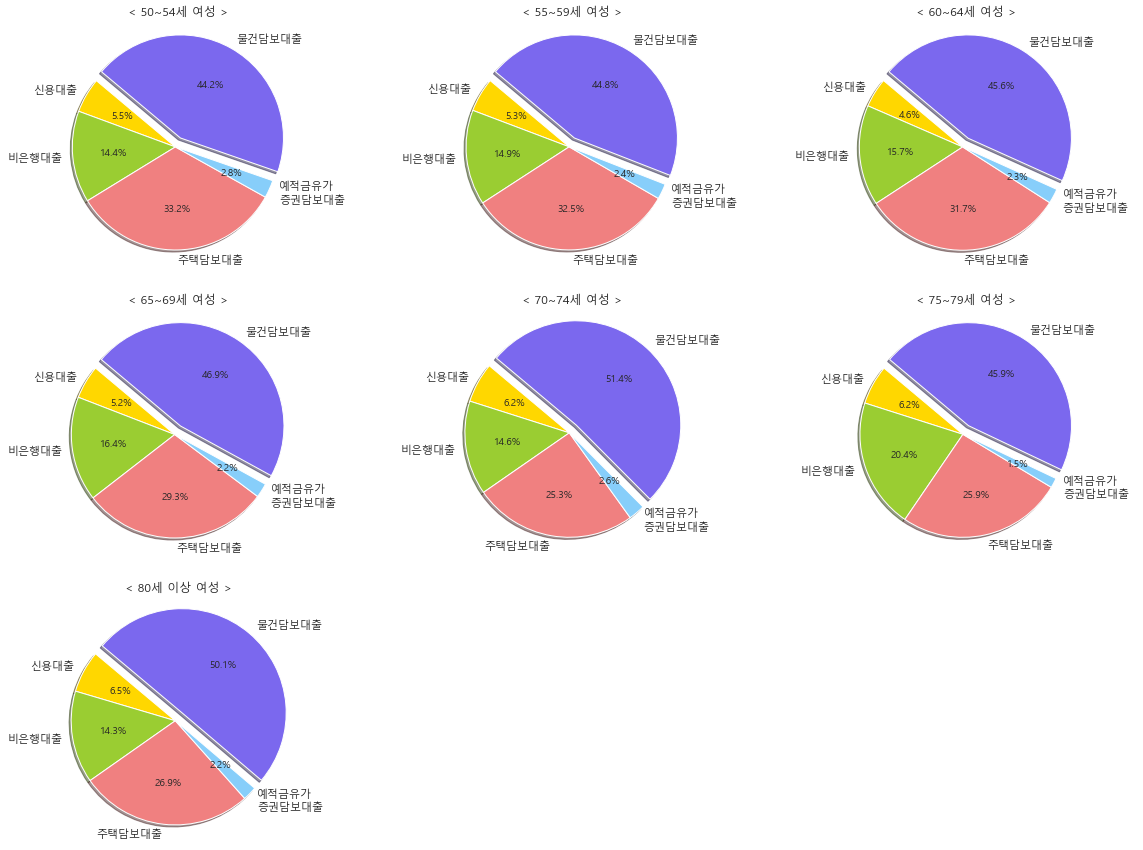

In [123]:
plt.figure(figsize=(20,15))

plt.subplot(331)
sizes = df4.iloc[19].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 50~54세 여성 >')


plt.subplot(332)
sizes = df4.iloc[20].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 55~59세 여성 >')


plt.subplot(333)
sizes = df4.iloc[21].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 60~64세 여성 >')


plt.subplot(334)
sizes = df4.iloc[22].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 65~69세 여성 >')

plt.subplot(335)
sizes = df4.iloc[23].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 70~74세 여성 >')

plt.subplot(336)
sizes = df4.iloc[24].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 75~79세 여성 >')

plt.subplot(337)
sizes = df4.iloc[25].values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumslateblue']
explode = (0, 0, 0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('< 80세 이상 여성 >')


plt.show()

In [125]:
df5 = df.groupby('남녀')[['avg_debt','avg_debt_credit','avg_debt_noneb','avg_debt_mortgage','avg_debt_deposit','avg_debt_collateral']].sum()
df5.columns = ['채무 평균보유액','신용대출','비은행대출','주택담보대출','예적금유가증권담보대출','물건담보대출']
df5

채무 평균보유액          신용대출         비은행대출        주택담보대출  예적금유가증권담보대출  \
남녀                                                                        
남성  543604445708  126974631257  247857763883  547433084151  57549790420   
여성  378517170407   85402843211  198683631738  461851915972  34544246018   

          물건담보대출  
남녀                
남성  796805490096  
여성  612756526056

### 그래프6. < 남녀 채무 비교 >
* 모든 항목에서 남성이 여성에 비해 대출이 많다.

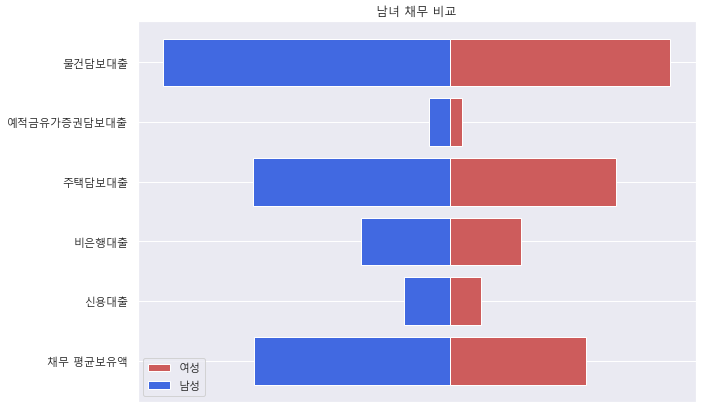

In [145]:
t = list(df5.columns)
m = df5.iloc[0].values
w = df5.iloc[1].values

fig, ax = plt.subplots(figsize=(10,7))
ax.xaxis.set_visible(False)

plt.title('남녀 채무 비교')
plt.barh(t,w,color='indianred',label='여성')
plt.barh(t,-m,color='royalblue',label='남성')
plt.legend()
plt.show()

In [146]:
df.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat', '남녀', '5세구간'],
      dtype='object')

In [148]:
df = df.drop(['year_month','남녀', '5세구간'], axis=1)

In [149]:
df.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

In [154]:
# 나이과 주택소유와의 관계
# 부동산가격이 없는경우 제외
df1 = df[(df['medium_resid_rat'] != -999999.0) & (df['large_resid_rat'] != -999999.0)].reset_index()
df1 = df1.drop('index', axis=1)
df1.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

In [153]:
### 경도/위도/주택거주비율에 따른 우편번호 - machine learning

In [155]:
# 리스트 조합
import itertools

lst = ['x_axis', 'y_axis','large_resid_rat','medium_resid_rat']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
    
print(combs)
print(len(combs))

[['x_axis'], ['y_axis'], ['large_resid_rat'], ['medium_resid_rat'], ['x_axis', 'y_axis'], ['x_axis', 'large_resid_rat'], ['x_axis', 'medium_resid_rat'], ['y_axis', 'large_resid_rat'], ['y_axis', 'medium_resid_rat'], ['large_resid_rat', 'medium_resid_rat'], ['x_axis', 'y_axis', 'large_resid_rat'], ['x_axis', 'y_axis', 'medium_resid_rat'], ['x_axis', 'large_resid_rat', 'medium_resid_rat'], ['y_axis', 'large_resid_rat', 'medium_resid_rat'], ['x_axis', 'y_axis', 'large_resid_rat', 'medium_resid_rat']]
15


In [156]:
col = ['[x_axis]', '[y_axis]', '[large\n_resid_rat]','[medium\n_resid_rat]', '[x_axis]\n-[y_axis]','[x_axis]\n-[large_resid_rat]','[x_axis]\n-[medium\n_resid_rat]', '[y_axis]\n-[large\n_resid_rat]','[y_axis]\n-[medium\n_resid_rat]','[large\n_resid_rat]\n-[medium\n_resid_rat]','[x_axis]\n-[y_axis]\n-[large\n_resid_rat]','[x_axis]\n-[y_axis]\n-[medium\n_resid_rat]','[x_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]','[y_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]','[x_axis]\n-[y_axis]\n-[large\n_resid_rat]\n-[medium\n_resid_rat]']
len(col)

15

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

accuracy_score_list = []

for i in range(len(combs)):
    X = df1[combs[i]]
    y = df1.zip_cd
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    Dtree = DecisionTreeClassifier()
    Dtree.fit(x_train,y_train)
    predictions_Decisiontree_model = Dtree.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,predictions_Decisiontree_model))
print(accuracy_score_list)
print(len(accuracy_score_list))

[0.9973856209150327, 0.9921568627450981, 0.03137254901960784, 0.048366013071895426, 1.0, 0.996078431372549, 0.9973856209150327, 0.9895424836601308, 0.9908496732026144, 0.11764705882352941, 0.9973856209150327, 1.0, 0.996078431372549, 0.9777777777777777, 0.9973856209150327]
15


### 그래프7. < 경도, 위도, 주택거주비율과 우편번호와의 관계 >
* DesicisonTreeClassifier(머신러닝)으로 학습 시켜봤다.
* 주택거주 비율과는 우편번호가 관계가 없다.
* X = ['x_axis', 'y_axis', 'medium_resid_rat'], y = zip_cd 일때 예측 정확도가 가장 높은 걸 확인 할 수 있다.

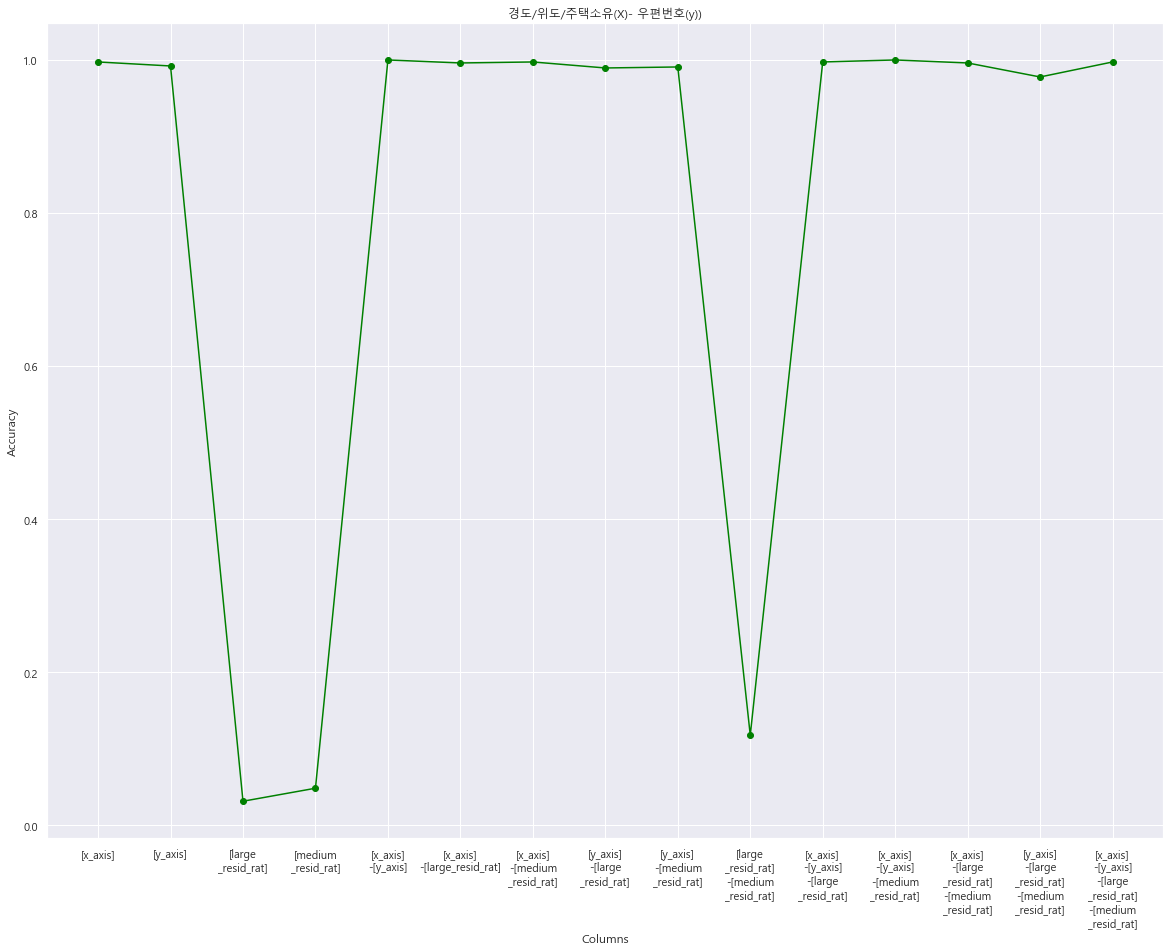

In [158]:
# 관련성 높음
from matplotlib import pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(col,accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.title('경도/위도/주택소유(X)- 우편번호(y))')
plt.ylabel("Accuracy")
plt.xlabel("Columns")
plt.show()

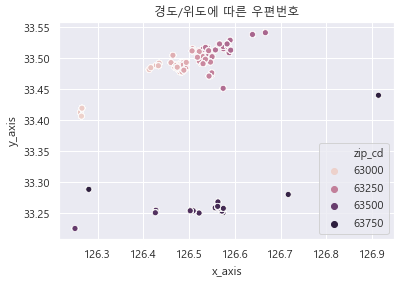

In [168]:
sns.scatterplot(x='x_axis', y='y_axis', hue = 'zip_cd',data=df1)
plt.title('경도/위도에 따른 우편번호')
plt.show()

In [10]:
df.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat', '남녀'],
      dtype='object')

In [12]:
df1 = df[(df['medium_resid_rat'] != -999999.0) & (df['large_resid_rat'] != -999999.0)].reset_index()
df1 = df1.drop('index', axis=1)
df1.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat', '남녀'],
      dtype='object')

In [38]:
df6 = df1.groupby(['avg_credit_rat'])[['medium_resid_rat', 'large_resid_rat','vehicle_own_rat']].mean()
df6.columns = ['중대형이상 거주비율','대형 거주비율','중대형 차량소유비율']
df6

중대형이상 거주비율   대형 거주비율  중대형 차량소유비율
avg_credit_rat                                  
2                 0.795015  0.155032    0.019659
3                 0.567733  0.081304    0.029462
4                 0.449432  0.059038    0.037351
5                 0.415717  0.025355    0.058002
6                 0.000000  0.000000    0.100000

### 그래프8. < 신용평균 등급별 부동산 및 차량 소유  >
* 부동산 가격 없는 경우는 제외한 데이터(데이터분석시 일반화 오류 발생 확률 높다.)
* 신용평균이 2에 가까울 수록 부동산/차량 소유 비율이 크다.
* 부동산소유비율이 차량소유비율보다 크다.
* 대형 거주비율이 중대형이상 거주 비율보다 높다.
* 등급이 2에 가까울수록 중대형 차량 소유비율은 낮아진다.

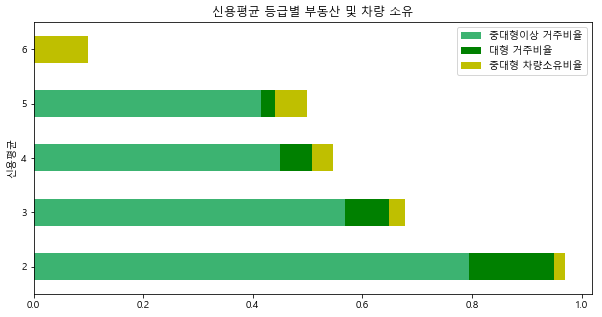

In [85]:
# 부동산 가격 없는 경우 제외한 데이터
df6.plot(kind = 'barh', stacked=True, grid = False, figsize = (10,5),
        color = ['mediumseagreen','g','y'])

plt.title('신용평균 등급별 부동산 및 차량 소유')
plt.ylabel('신용평균')
plt.show()